# 5.2 Ajuste linear nos parâmetros

Uma função do tipo 

$$ g(x) = a_1 g_1(x) + a_2 g_2(x) + ... + a_n g_n(x)$$

é dita um _modelo de regressão linear_. O adjetivo "linear" é usado para indicar que o modelo é linear nos parâmetros $a_1$, $a_2$,..., $a_n$ e não porque é um função linear de $x$. Por exemplo, uma expressão da forma

$$ y = a_1 + a_2 log(x) + a_3 x^3 $$ 

é um modelo de regressão linear múltipla, assim como os ajustes polinomiais feitos nos capítulos anteriores, mas o mesmo não acontece com a equação 

$$y =a_1 + a_2 x^{a_3} + a_4 x^2$$

Algumas maneiras de justar funções não lineares serão discutidos nas próximas seções. Por hora, apresentamos um exemplo de ajuste linear não polinomial.

### Generalizando

Generalizando o procedimento, podemos determinar os coeficientes $a_1,a_2,...,a_n$ da função$ g(x) = a_1g_1(x)+a_1g_1(x)+...+a_ng_n(x)$ resolvendo o sistema linear formado pelas equações 

$$ \frac{\partial E}{\partial a_1} = 0, \,\,  \frac{\partial E}{\partial a_2} = 0, ..., \,\, \frac{\partial E}{\partial a_n} = 0$$ 

ou seja, 

$$ \begin{cases} 
\left(\sum_{i=1}^{m} g_1(x_i)g_1(x_i)\right)a_1 + \left(\sum_{i=1}^{m} g_1(x_i)g_2(x_i)\right)a_2+...+\left(\sum_{i=1}^{m} g_1(x_i)g_n(x_i)\right)a_n = \sum_{i=1}^{m} f(x_i)g_1(x_i) \\
\left(\sum_{i=1}^{m} g_2(x_i)g_1(x_i)\right)a_1 + \left(\sum_{i=1}^{m} g_2(x_i)g_2(x_i)\right)a_2+...+\left(\sum_{i=1}^{m} g_2(x_i)g_n(x_i)\right)a_n = \sum_{i=1}^{m} f(x_i)g_2(x_i) \\
\vdots\\
\left(\sum_{i=1}^{m} g_n(x_i)g_1(x_i)\right)a_1 + \left(\sum_{i=1}^{m} g_n(x_i)g_2(x_i)\right)a_2+...+\left(\sum_{i=1}^{m} g_n(x_i)g_n(x_i)\right)a_n = \sum_{i=1}^{m} f(x_i)g_n(x_i) \\
\end{cases} $$

**Exemplo 1:** Dado o seguinte conjunto de dados
$$
  \begin{array}{l|ccccccccccc}
  \hline
x_i & 0,0 & 0,1 & 0,2 & 0,3 & 0,4 & 0,5 & 0,6 & 0,7 & 0,8 & 0,9 & 1,0\\\hline
      y_i & 31 & 35 & 37 & 33 & 28 & 20 & 16 & 15 & 18 & 23 & 31\\
    \hline
  \end{array}
$$

Encontre a função do tipo $f(x)=a+b\sin(2\pi x)+c\cos(2\pi x)$ que melhor aproxima os valores dados.

In [1]:
import numpy as np
from scipy.linalg import solve
import matplotlib.pyplot as plt

In [2]:

x = np.linspace(0.0,1.0, 11)
y = np.array([31.,35.,37,33.,28.,20.,16.,15.,18.,23.,31.])

In [3]:
g1 = lambda x: np.ones(len(x))
g2 = lambda x: np.sin(2*np.pi*x)
g3 = lambda x: np.cos(2*np.pi*x)

In [4]:
V = np.array([g1(x), g2(x), g3(x)])

In [5]:
A = V.dot(V.T)
B = np.dot(V,y)
a = np.linalg.solve(A,B)

In [6]:
g = lambda x: a[0]*g1(x)+a[1]*g2(x)+a[2]*g3(x)

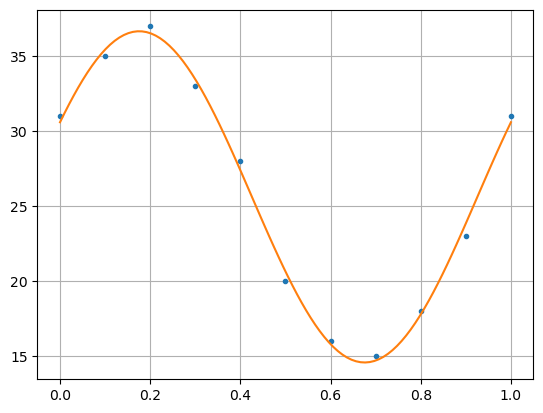

In [7]:
# Plota os pontos e a função g(x)
xp = np.linspace(0.0,1.0,100)
plt.plot(x, y, ".")
plt.plot(xp, g(xp), "-") 
plt.grid()
plt.show()

**Exemplo 2:** Considere o segunte conjunto de pontos

$$\begin{array}{cccccccccccc}
x_i    &-0.5 &0.0 &0.5 &1.0 &1.5 &2.0 &2.5 &3.0 &3.5 &4.0 &4.5\\ 
f(x_i) &-0.25 &0.5 &0.25 &0.0 &0.75 &1.5 &1.25 &1.00 &1.75 &2.5 &2.25
\end{array} $$

Usando o método dos mínimos quadrados, ajuste uma função $g(x)$ aos dados.

**Solução:**
Primeiramente, construimos o diagrama de dispersão dos pontos dados: 

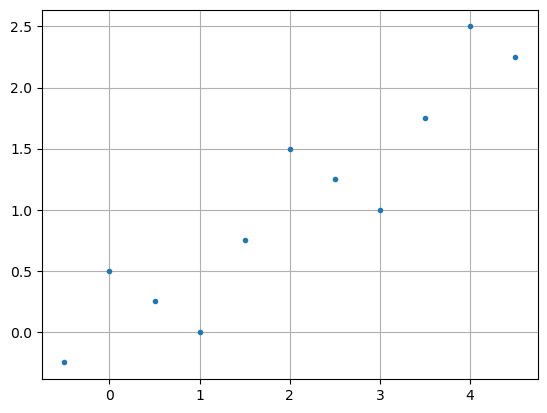

In [8]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5])
Y = np.array([-0.25, 0.5, 0.25, 0.0, 0.75, 1.5, 1.25, 1.00, 1.75, 2.5, 2.25])

# Plota os pontos e a reta
plt.plot(X, Y, ".") 
plt.grid()
plt.show()

É possível perceber que os pontos parecem crescer linearmente mas também parecem oscilar com período igual a 2. 

Essas características sugerem uma função do tipo $g(x) = a_1x+a_2 \cos(\pi x)$ em que $g_1(x)=x$ e $g_2(x) = cos(\pi x)$.

[-0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5]
71.5 2.0000000000000018 5.0
36.75 3.5000000000000004
[0.5 0.5]


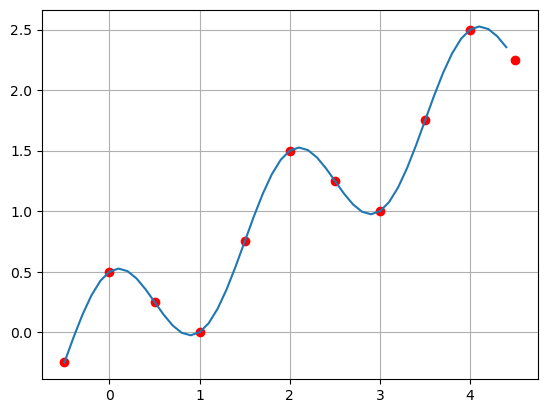

In [9]:
from scipy.linalg import solve

# Calcula os elementos das marizes
g1 = lambda X: X
g2 = lambda X: np.cos(np.pi*X)

print (g1(X))
a11 = np.sum(np.multiply(g1(X),g1(X)))
a12 = np.sum(np.multiply(g1(X),g2(X)))
a21 = a12
a22 = np.sum(np.multiply(g2(X),g2(X)))

print (a11, a12, a22)

b1 = np.sum(np.multiply(Y,g1(X)))
b2 = np.sum(np.multiply(Y,g2(X)))

print (b1,b2)


# Monta e resolve o sistema
A = np.array([[a11, a12],
              [a21, a22]])

B = np.array([b1,b2])

a = solve(A, B)
print (a)

# define a funcao g(x) para plotar 
g = lambda X: a[0]*g1(X)+a[1]*g2(X)

# cria pontos (x, y) da reta 
Xr = np.arange(X[0], X[-1], 0.1)
Yr = g(Xr)   

# Plota os pontos e a reta
plt.plot(X, Y, "ro", Xr, Yr, "-") 
plt.grid()
plt.show()


### Caso contínuo

No caso da função $f(x)$ ser conhecida, podemos ajustar a função $g(x)$ de modo a minimizar 

$$ E = \int_a^b [e(x)]^2 dx = \int_a^b [f(x)-g(x)]^2 dx$$

o que leva a necessidade de resolução do sistema linear

$$\left[\begin{array}{cccc}
	         \langle g_1,g_1 \rangle &\langle g_1,g_2 \rangle &... &\langle g_1,g_n \rangle\\ 
	         \langle g_2,g_1 \rangle &\langle g_2,g_2 \rangle &... &\langle g_2,g_n \rangle\\  
             \vdots \\
             \langle g_n,g_1 \rangle &\langle g_n,g_2 \rangle &... &\langle g_n,g_n \rangle\\ 
	    \end{array} \right]
\left[\begin{array}{c} 
	         a_1 \\ 
	         a_2 \\
             \vdots \\
             a_n
	  \end{array} \right]
=
\left[\begin{array}{c} 
	         \langle f,g_1 \rangle \\ 
	         \langle f,g_2 \rangle \\ 
             \vdots \\
             \langle f,g_n \rangle \\ 
	  \end{array} \right] 
             $$
             
Com $\langle f,g \rangle$ sendo o produto escalar entre as funções $f$ e $g$, definido como 

$$ \langle f,g \rangle = \int_a^b f(x)g(x)dx$$

**Exemplo 3:** (Darezzo, 2016, p190)

[-0.59854891  0.17695201]


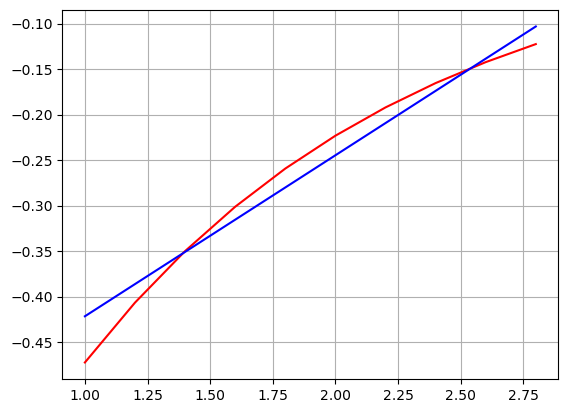

In [10]:
import numpy as np
from scipy.linalg import solve
import matplotlib.pyplot as plt
from scipy.integrate import quad
import math
from numpy import exp

g1g1 = lambda x: 1
g1g2 = lambda x: x
g2g2 = lambda x: x**2
fg1 = lambda x: -math.exp(-0.75*x)
fg2 = lambda x: -x*math.exp(-0.75*x)




# Calcula os elementos das marizes
a11 = quad(g1g1, 1, 3)[0]
a12 = quad(g1g2, 1, 3)[0]
a22 = quad(g2g2, 1, 3)[0]
b1 = quad(fg1, 1, 3)[0]
b2 = quad(fg2, 1, 3)[0]



# Monta e resolve o sistema
A = np.array([[a11, a12], [a12, a22]])

B = np.array([b1,b2])

a = solve(A, B)
print (a)

# define a funcao g(x) para plotar 
g = lambda x: a[0]+a[1]*x

# cria pontos (x, y) da reta 
Xr = np.arange(1, 3, 0.2)
#print (Xr)

#Y = np.exp(X)

# Plota os pontos e a reta
plt.plot(Xr, -np.exp(-0.75*Xr), "r-", Xr, g(Xr), "b-") 
plt.grid()
plt.show()